<h1 style="color:orange">EXERCISE CLASS 1 (Part 2/3)</h1> 

# EXERCISE 1

A courier service guarantees high priority items to be delivered by 10.30 a.m. of next working day. A manager analyzed an historical set of data and he found out that the delivery time follows a normal distribution with mean equal to 10.00 a.m. and standard deviation equal to 9 minutes.

- a.  Compute the expected nonconformity of the delivery process, where a nonconforming delivery is a late delivery (express the result in ppm, i.e., parts per million);
- b. Compute the probability that an item is delivered between 9.40 a.m. and 10.10 a.m.
- c. Compute the time when we can expect that 90% of items will be delivered.

In [34]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

# Increase the plot and font size 
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14

Express the time variable in minutes; assume 10.00 a.m. as time 0
Delivery time is:
$$X \sim N(0,9^{2})$$

### Point a)

$$Pr(X \leqslant 30) = \phi \biggl(\frac{30-0}{9} \biggl) = \phi(3.3333)$$

In [35]:
# Input the data of the problem
sigma = 9  # variance
mu = 0   # mean

#calculate the cumulative probability of z1 (standard normal distribution)
z1 = (30 - mu)/sigma
p1 = stats.norm.cdf(z1)

print("z1 = %.6f" % z1)
print("Cumulative normal of z1 = %.6f" % p1)

P_late = 1-p1
print("Probability of late delivery = %.6f" % P_late)


z1 = 3.333333
Cumulative normal of z1 = 0.999571
Probability of late delivery = 0.000429


In [36]:
#or, as an alternative, compute the cumulative probability of x1 = 30 (with mean 0 and standard deviation 9)
x1 = 30
p1 = stats.norm.cdf(x1,0,9)

print("x1 = %.6f" % x1)
print("Cumulative normal of x1 = %.6f" % p1)

P_late = 1-p1
print("Probability of late delivery = %.6f" % P_late)

x1 = 30.000000
Cumulative normal of x1 = 0.999571
Probability of late delivery = 0.000429


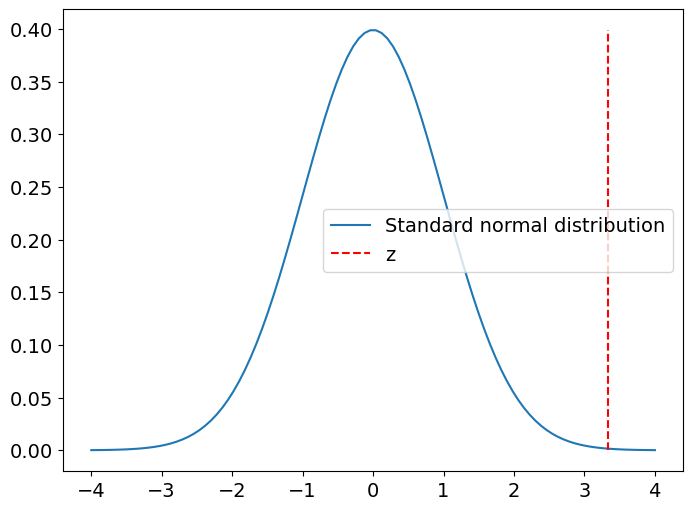

In [37]:
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Standard normal distribution')


# Plot the z value
plt.vlines(z1, 0, np.max(y), color='red', linestyles='dashed', label='z')

plt.legend()

plt.show()

The probability of late delivery is:

$$ 1 - P(X \leqslant 30) = 1 - 0.999571 = 0.000429 = 0.0429\% = 429 ppm$$

In [38]:
#probability of late delivery in ppm

Pppm = P_late * 1000000
print("Probability of late delivery in ppm = %.0f ppm" % Pppm)

Probability of late delivery in ppm = 429 ppm


### Point b)
Compute the probability that an item is delivered between 9.40 a.m. and 10.10 a.m.

 $$Pr(-20 \leqslant X \leqslant 10)=Pr(X \leqslant 10)-Pr(X \leqslant-20)$$

In [39]:
#calculate the cumulative normal of z1
z_a = (-20 - mu)/sigma
z_b = (10 - mu)/sigma
p_a = stats.norm.cdf(z_a)
p_b = stats.norm.cdf(z_b)

Prob_b = p_b - p_a

print("Probability = %.6f" % Prob_b)


Probability = 0.853606


> The probability that an item is delivered between 9.40 a.m. and 10.10 a.m. is:

$$Pr(X \leqslant 10)-Pr(X \leqslant-20) = 85.36\%$$

### Point c)

Compute the time when we can expect that 90% of items will be delivered.


In [40]:
# compute the inverse cumulative function of the standard normal distribution @ P = 0.9  
z_90 = stats.norm.ppf(0.90)

print("The lower 90%% percentile of the standard normal distribution is z_90 = %.6f" % z_90)

# then go back to the normal distribution with zero mean and standard deviation 9
x_90 = z_90*sigma + mu 

print("The answer is x_90 = %.6f" % x_90)

The lower 90% percentile of the standard normal distribution is z_90 = 1.281552
The answer is x_90 = 11.533964


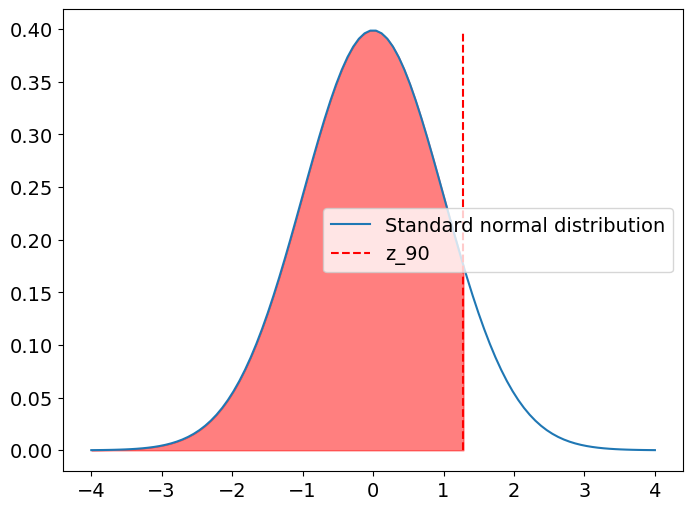

In [41]:
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Standard normal distribution')


# Plot the z value such that the its cumulative probability is P = 0.9
plt.vlines(z_90, 0, np.max(y), color='red', linestyles='dashed', label='z_90')

x_fill = np.linspace(-4, z_90, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5)

plt.legend()

plt.show()